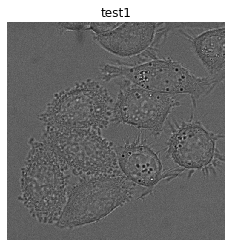

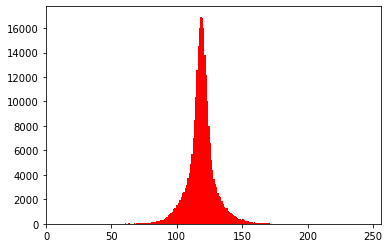

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import watershed
from sklearn.cluster import MeanShift
from scipy import ndimage 


img = cv2.imread('./data/DIC-C2DH-HeLa/Sequence 1/t002.tif',cv2.IMREAD_UNCHANGED)

plt.figure('test1')
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('test1')
plt.show()

hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()


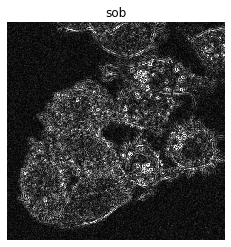

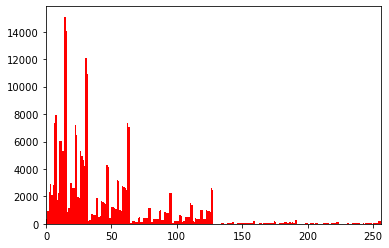

In [36]:

sobelX = cv2.Sobel(img,cv2.CV_64F,1,0)#x方向的梯度
sobelY = cv2.Sobel(img,cv2.CV_64F,0,1)#y方向的梯度

sobelX = np.uint8(np.absolute(sobelX))#x方向梯度的绝对值
sobelY = np.uint8(np.absolute(sobelY))#y方向梯度的绝对值

sobelCombined = cv2.bitwise_or(sobelX,sobelY)#
plt.figure('sob')
plt.imshow(sobelCombined,cmap='gray')
plt.axis('off')
plt.title('sob')
plt.show()


hist,bins = np.histogram(sobelCombined.flatten(),256,[0,256])
plt.hist(sobelCombined.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()



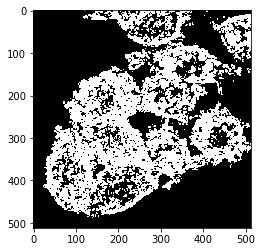

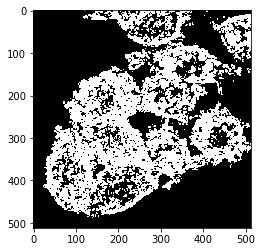

In [68]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

ret, thresh = cv2.threshold(sobelCombined, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh=cv2.dilate(thresh, np.ones((3,3), np.uint8))
D = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,np.ones((3,3)))
plt.imshow(D,cmap='gray')
plt.show()

####  connect
connectivity = 8 # or whatever you prefer
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(D, connectivity,cv2.CV_32S)


sizes = stats[1:, -1]
nb_components = nb_components - 1

# minimum size of particles we want to keep (number of pixels)
#here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
min_size = 0

#your answer image
img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        img2[output == i + 1] = 255

# img2 = cv2.dilate(img2,np.ones((3,3)),iterations=3)
# img2 = cv2.erode(img2,np.ones((3,3)),iterations=3)
plt.imshow(img2, cmap='gray')
plt.show()



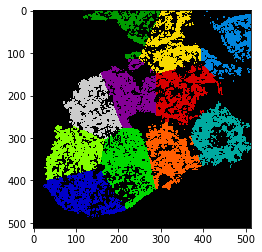

In [88]:
from sklearn.cluster import KMeans
X =[]
for y in range(len(img2)):
    for x in range(len(img2)):
        if img2[y,x]!=0:
            X.append([y,x])
X = np.array(X)
y_pred = KMeans(n_clusters=11).fit_predict(X)

output = np.zeros(img2.shape)
for i in range(len(X)):
    output[X[i,0],X[i,1]]=y_pred[i]+1
plt.imshow(output,cmap=plt.cm.nipy_spectral)
plt.show()

In [84]:
X[0,0]


0